In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

In [4]:
df = pd.read_csv('data.csv')

In [5]:
wage, value = [],[]
for i in df['Wage']:
    wage.append(float(i.replace('€', '').replace('K', '000')))
for v in df['Value']:
    value.append(float(v.replace('€', '').replace('.', '').replace('M', '000000').replace('K', '000')))

In [6]:
df['Value'] = value
df['Wage'] = wage

In [7]:
df['Gap'] = df['Value'] - df['Wage']

In [8]:
new = df[['Name','Value', 'Wage', 'Gap']]

In [9]:
new.sort_values(by='Gap', ascending=False)

,Name,Value,Wage,Gap
2,Neymar Jr,1.185000e+09,290000.0,1.184710e+09
0,L. Messi,1.105000e+09,565000.0,1.104435e+09
16,H. Kane,8.350000e+08,205000.0,8.347950e+08
11,T. Kroos,7.650000e+08,355000.0,7.646450e+08
31,C. Eriksen,7.350000e+08,205000.0,7.347950e+08
...,...,...,...,...
12453,W. Díaz,0.000000e+00,1000.0,-1.000000e+03
12192,H. Sulaimani,0.000000e+00,3000.0,-3.000000e+03
3550,S. Nakamura,0.000000e+00,4000.0,-4.000000e+03
4228,B. Nivet,0.000000e+00,5000.0,-5.000000e+03


### Seaborn

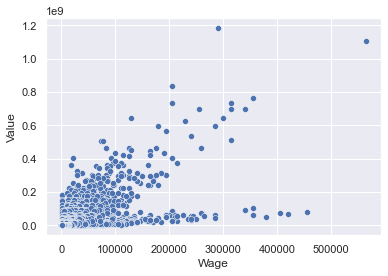

In [10]:
sns.set()
graph = sns.scatterplot(x='Wage', y='Value', data=new)

### Bokeh

In [11]:
hover = HoverTool(tooltips = [
    ("index", "$index"),
    ("(Wage,Value)", "($x, $y)"),
    ("Name", "@Name")
])

In [12]:
p = figure(title='Fifa19 Waged', x_axis_label='Wage', y_axis_label='Value', tools=[hover])

In [13]:
p.scatter('Wage', 'Value', size=7, source=new)

GlyphRenderer(id='1027', ...)

In [14]:
show(p)